# <font color=Blue> UC Machine Learning Group Assignment</font> 

#### Group Members:
-  _Pratik Chatterjee_<br>
- _Tejas Shah_<br>
- _Prateek Choudhury_


## Introduction:


### Problem Statement:






#### Contents:

___1. Importing Libraries___

___2. Data Gathering___

___3. Exploratory Data Analysis and Transformation___

        __Exploratory Data Analysis
                
               __ 

___4. Creating Dummy Variables___

___5. Handling Imbalanced Data___

            __SMOTE Technique

___6. Diamention Reduction Technique___

            ___ Recursive Feature Elimination
            

___7. Model Implementation and Scoring___

            ___ Logistoc Regression
            ___ Decision Tree
            ___ Random Forest
            ___ Support Vector Machines
            
___8. Cross Validation and Hyperparameter Tuning___

___9. Predictions___

___10. References___


#### Importing Required Libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

#### Data Gathering








_Loading Data_

In [9]:
data=pd.read_csv('data.csv')

In [282]:
data.shape    #The dataset has 41188 rows and 21  

(41188, 21)

In [283]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [284]:
data.shape

(41188, 21)

In [285]:
data.columns # checking the names of columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [286]:
data.isna().sum() # Cross- checking if we have any null values

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [287]:
data.describe() #It gives us a snapshot of all the continious variables

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


## Exploratory data Analysis and Transformation

In [292]:
# categorical variables
data['job'].unique() #Checking how many unique variables does the 'Job' variable has.

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [293]:
data['education'].unique() # Checking how many unique values does the 'education' variable has.

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

_<font color=green>'basic.4y', 'basic.6y' and 'basic.9y' can be combined together as 'basic'</font>_

In [294]:
data['education']=np.where(data['education']=='basic.4y','basic',data['education']) # combining basic 4y,6y and 9y as basic
data['education']=np.where(data['education']=='basic.9y','basic',data['education'])
data['education']=np.where(data['education']=='basic.6y','basic',data['education'])

In [297]:
data['education'].unique() # after combining basic the unique values in variable 'education'

array(['basic', 'high.school', 'professional.course', 'unknown',
       'university.degree', 'illiterate'], dtype=object)

### Exploratory Data Analysis

_<font color=green>We will explore the dataset and try to find some interesting analysis about the data. <br>
    We will also try to see the data visually.</font>_



<font color=seablue>___Count of Unique Predictors___

In [300]:
data['y'].value_counts(normalize=False) # checking the number of unique values that our predictor has

0    36548
1     4640
Name: y, dtype: int64

<font color=seablue>___Percentage of Unique Predictors___

In [301]:
data['y'].value_counts(normalize=True) # checking the percentage of each unique values that the predictor has.

0    0.887346
1    0.112654
Name: y, dtype: float64

<font color=seablue>___Average of continious variables compared to Predictor___

In [302]:
data.groupby('y').mean() # We will see the mean values of each continious variable with respect to our predictor.

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


#### Observations.</font>

_<font color=green>1.The percentage of no subscription is 89% compared to 11% of subscribers._<br>

_<font color=green>2.The percentage of subscription gives a direct indication that the data imbalance and we need to deal with it._<br>
    
_<font color=green>3.The average age of subscribers are more than the non- subscribers during the current promotions._<br>
    
_<font color=green>4.The average durations that were spent to convince the subscribers are more than the non- subscribers. This is little gittering as the number of non- subscribers are more and more time should have been given to non- subscribers._<br>


</font>

<font color=seablue>___Average continious variable compared to job title___

In [10]:
data.groupby('job').mean() #The average of all compared to job title.

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
job,,,,,,,,,,,
admin.,38.187296,254.312128,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350,0.129726
blue-collar,39.555760,264.542360,2.558461,985.160363,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150,0.068943
entrepreneur,41.723214,263.267857,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530,0.085165
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623,0.100000
management,42.362859,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513,0.112175
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151,0.252326
self-employed,39.949331,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384,0.104856
services,37.926430,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126,0.081381
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086,0.314286





<font color=seablue>_**Purchase of Term deposit with job title**_

Text(0,0.5,'purchases')

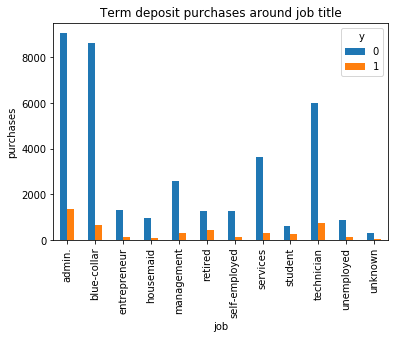

In [304]:
pd.crosstab(data.job,data.y).plot(kind='bar')
plt.title('Term deposit purchases around job title')
plt.ylabel('purchases')

##### Observation:

-  _<font color=green> 'admins' and 'technicians' have purchased the most term deposits followed by blue-collar. Also the number of people not purchased are more for the three catagories._  
-  _<font color=green>It seems that 'job title' is one of the important predictor as sale of term deposit depends a great deal on it._


<font color=seablue>___Marital status compared to sale of term deposit___

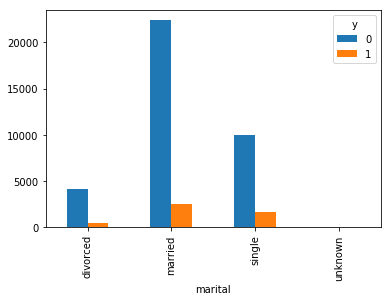

In [305]:
pd.crosstab(data.marital,data.y).plot(kind='bar')

#### Observation:

- _<font color=green> There is little variation in the buying pattern of the term deposit across marital status. Although it can be a predictor but not potential._

<font color=seablue>___Sale of term deposit with respect to education level___

<function matplotlib.pyplot.ylabel(s, *args, **kwargs)>

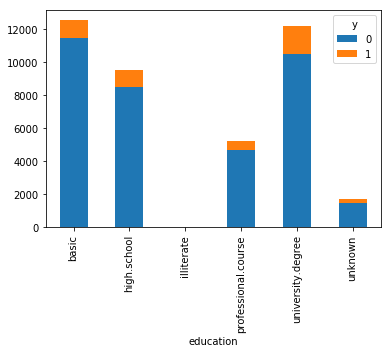

In [306]:
pd.crosstab(data.education,data.y).plot(kind='bar',stacked=True)
plt.ylabel

#### Observation:

- _<font color=green> The variations of purchase patter around the education level is good. Education can be a potential predictor._

In [307]:
# There other variables that we can go on looking to find the relations with predictors

## Creating Dummy Variables

In [308]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']

for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list=pd.get_dummies(data[var],prefix=var)
    data1=data.join(cat_list)
    data=data1
    
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]
    

In [309]:
data_final=data[to_keep]
data_final.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',

In [311]:
data_final.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0


In [312]:
# http://imbalanced-learn.org/en/stable/over_sampling.html#smote-variants- SMOTE
# https://arxiv.org/pdf/1106.1813.pdf- understanding SMOTE

### Handling Imbalanced Data using SMOTE technique

In [313]:
X=data_final.loc[:,data_final.columns !='y'] # removing the Y variable from X
Y=data_final.loc[:,data_final.columns=='y'] # taking only the predictor into Y

In [314]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [315]:
OS = SMOTE(random_state=100)

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X,Y,test_size=0.2,random_state=100)

In [316]:
columns=X_Train.columns

In [317]:
OS_data_X,OS_data_Y=OS.fit_sample(X_Train, Y_Train)
OS_data_X= pd.DataFrame(data=OS_data_X,columns=columns)
OS_data_Y=pd.DataFrame(data=OS_data_Y,columns=['Y'])

In [318]:
len(OS_data_X) # data in X

58426

### Diamention Reduction 


#### Recursive Feature Elimination

In [319]:
data_final_vars=data_final.columns.values.tolist()

Y=['y']
X=[i for i in data_final_vars if i not in Y]

In [320]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [321]:
logreg = LogisticRegression()

In [322]:
rfe=RFE(logreg,20)

In [323]:
rfe = rfe.fit(OS_data_X,OS_data_Y.values.ravel())

In [324]:
print(rfe.ranking_)

[41 37 28 40  1 14 21 31  1 35  8  1  3  4  7 33  1  2 34  6  5 15 20 19
 18  1 22 24  1 23 36 30  1  1 42 29 39 32 26 38 27  1  1  1  1  1  1  1
 13  1  1 25  1 10 17 11 12  9  1 16  1]


In [325]:
print(rfe.support_)

[False False False False  True False False False  True False False  True
 False False False False  True False False False False False False False
 False  True False False  True False False False  True  True False False
 False False False False False  True  True  True  True  True  True  True
 False  True  True False  True False False False False False  True False
  True]


In [326]:
print(rfe.n_features_)

20


In [329]:
cols=['previous','euribor3m','job_blue-collar','job_self-employed','marital_unknown','education_illiterate','default_no',
     "default_unknown","contact_cellular","contact_telephone","month_apr","month_aug","month_dec","month_jul","month_jun",
     'month_may','month_nov','month_sep',"poutcome_failure",'poutcome_success']

In [14]:
X=OS_data_X[cols]
Y=OS_data_Y['Y']

NameError: name 'OS_data_X' is not defined

# MODEL Implementation

In [12]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

___<font color=seablue> Logistic Regression___

In [13]:
logit_model=sm.Logit(Y, X)

NameError: name 'Y' is not defined

In [334]:
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.543364
         Iterations: 35
                             Results: Logit
Model:                 Logit              Pseudo R-squared:   0.216     
Dependent Variable:    Y                  AIC:                63533.1309
Date:                  2019-02-08 03:10   BIC:                63712.6413
No. Observations:      58426              Log-Likelihood:     -31747.   
Df Model:              19                 LL-Null:            -40498.   
Df Residuals:          58406              LLR p-value:        0.0000    
Converged:             0.0000             Scale:              1.0000    
No. Iterations:        35.0000                                          
------------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|    [0.025   0.975] 
------------------------------------------------------------------------
previous              0.2820   0.0468   6.0261 0.0000    0.1903   0.3737
euribor3m     

#### Observation:

<font color=green>_There are 4 variables which has p-value > 0.05. Hence we will remove those and rerun the model._

In [336]:
col1=['previous','euribor3m','job_blue-collar','job_self-employed','marital_unknown','education_illiterate',
      "month_apr","month_aug","month_dec","month_jul","month_jun",
     'month_may','month_nov','month_sep',"poutcome_failure",'poutcome_success']

In [337]:
X=OS_data_X[col1]
Y=OS_data_Y['Y']

In [338]:
# spliting the data into train and test

In [339]:
X_Train, X_Test, Y_Train, Y_Test=train_test_split(X,Y,test_size=0.2,random_state=100)

In [340]:
from sklearn import tree,ensemble
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.svm import SVC

In [341]:
logreg= LogisticRegression()
logreg.fit(X_Train, Y_Train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [342]:
Y_pred=logreg.predict(X_Train)

In [343]:
acc_score_Logistic=accuracy_score(Y_Train, Y_pred,normalize=True)

In [344]:
acc_score_Logistic

0.7401797175866496

<font color=seablue>___Decision Tree___

In [345]:
# Decision Tree
decision_Tree= tree.DecisionTreeClassifier()
decision_Tree.fit(X_Train, Y_Train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [346]:
Y_Pred=decision_Tree.predict(X_Train)
acc_score_decision_Tree=accuracy_score(Y_Train, Y_Pred)
print(acc_score_decision_Tree)

0.9425759520753102


<font color=seablue>___Random Forest___

In [347]:
# Random Forest
random_forest=RandomForestClassifier(n_estimators=100)
random_forest.fit(X_Train, Y_Train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [348]:
Y_prediction=random_forest.predict(X_Train)
acc_score_random_forest=accuracy_score(Y_Train,Y_prediction)
print(acc_score_random_forest)

0.9425759520753102


<font color=seablue>__Support Vector Machine__

In [349]:
# Linear SVC

svclassifier= SVC(kernel='linear', C=0.1)

In [350]:
svclassifier.fit(X_Train, Y_Train)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [351]:
Y_Predct=svclassifier.predict(X_Train)
accu_score_SVM=accuracy_score(Y_Train, Y_Predct)
print(accu_score_SVM)

0.7189987163029525


#### BEST MODEL SCORE

In [352]:
results=pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Support Vector Machines'],
    'Score': [acc_score_Logistic, acc_score_decision_Tree, acc_score_random_forest, accu_score_SVM]})

result_df= results.sort_values(by='Score', ascending=False)
result_df= result_df.set_index('Score')
result_df.head()

,Model
Score,
0.942576,Decision Tree
0.942576,Random Forest
0.740180,Logistic Regression
0.718999,Support Vector Machines


<font color=green>_We can see Decision Tree and Random Forest are giving the best scores. We will use the Random Forest to further tune and predict the final outcome._

# K- Fold Cross Validation

In [353]:
# Running K_folds cross validation by spliting the data into K subsets called folds.

In [354]:
from sklearn.model_selection import cross_val_score
rf=RandomForestClassifier(n_estimators=100)
scores=cross_val_score(rf, X_Train, Y_Train, cv=10, scoring="accuracy")

In [355]:
print("Scores:", scores)

Scores: [0.92042781 0.92255028 0.91634574 0.92468977 0.91955499 0.92255028
 0.92511767 0.91934104 0.92297818 0.92231971]


In [356]:
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Mean: 0.9215875458258767
Standard Deviation: 0.0025378896871103935


Our Random forest model has an average accuracy of 92% with a standard deviation of 0.3 %. That means the accuracy of our model can differ +- 0.3%.

In [357]:
# The accuracy is good but we will do a hyperparameter tuning.

In [358]:
 ####Random Forest######

In [359]:
# Feature Importance

In [360]:
importance= pd.DataFrame({'feature': X_Train.columns, 'importance': np.round(random_forest.feature_importances_,3)})
importance= importance.sort_values('importance', ascending= False).set_index('feature')

In [361]:
importance.head(16)

,importance
feature,
euribor3m,0.416
job_blue-collar,0.129
month_may,0.086
previous,0.078
poutcome_failure,0.053
month_jul,0.050
month_jun,0.039
month_aug,0.037
month_apr,0.030


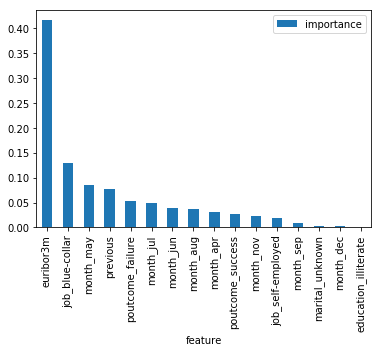

In [362]:
importance.plot.bar()

<font color=green>_The last 4 features, 'education illiterate','month dec','marital unknown','month sep' does not play a significant role in our random forest classifiers prediction process. We  will drop them from the dataset and train the classifier again._

In [278]:
#X_Train_new=X_Train.drop(["education_illiterate","month_dec","marital_unknown","month_sep"],axis=1, inplace=True)

In [363]:
X_Train1=X_Train.drop("education_illiterate",axis=1)
X_Test1=X_Test.drop("education_illiterate",axis=1)

In [367]:
X_Train2=X_Train1.drop("month_dec",axis=1)
X_Test2=X_Test1.drop("month_dec",axis=1)

In [369]:
X_Train3=X_Train2.drop("marital_unknown",axis=1)
X_Test3=X_Test2.drop("marital_unknown",axis=1)

In [371]:
X_Train_new=X_Train3.drop("month_sep",axis=1)
X_Test_new=X_Test3.drop("month_sep",axis=1)

#### Training Random Forest again

In [372]:
random_forest= RandomForestClassifier(n_estimators=100,oob_score=True)
random_forest.fit(X_Train_new, Y_Train)
Y_Prediction= random_forest.predict(X_Train_new)

In [373]:
random_forest.score(X_Train_new, Y_Train)
acc_random_forest= round(random_forest.score(X_Train_new, Y_Train)*100, 2)
print(round(acc_random_forest,2,), "%")

94.23 %


#### Hyperparameter Tuning

In [396]:
param_grid=[{'max_depth':[2,4,6,10,12,16,20,None],
            'max_features':[1,4,8,12,16]}]

In [397]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [398]:
gs=GridSearchCV(estimator=RandomForestClassifier(random_state=100),param_grid=param_grid,cv=10)

In [399]:
gs.fit(X_Train,Y_Train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=100, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'max_depth': [2, 4, 6, 10, 12, 16, 20, None], 'max_features': [1, 4, 8, 12, 16]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [400]:
gs.cv_results_['params']

[{'max_depth': 2, 'max_features': 1},
 {'max_depth': 2, 'max_features': 4},
 {'max_depth': 2, 'max_features': 8},
 {'max_depth': 2, 'max_features': 12},
 {'max_depth': 2, 'max_features': 16},
 {'max_depth': 4, 'max_features': 1},
 {'max_depth': 4, 'max_features': 4},
 {'max_depth': 4, 'max_features': 8},
 {'max_depth': 4, 'max_features': 12},
 {'max_depth': 4, 'max_features': 16},
 {'max_depth': 6, 'max_features': 1},
 {'max_depth': 6, 'max_features': 4},
 {'max_depth': 6, 'max_features': 8},
 {'max_depth': 6, 'max_features': 12},
 {'max_depth': 6, 'max_features': 16},
 {'max_depth': 10, 'max_features': 1},
 {'max_depth': 10, 'max_features': 4},
 {'max_depth': 10, 'max_features': 8},
 {'max_depth': 10, 'max_features': 12},
 {'max_depth': 10, 'max_features': 16},
 {'max_depth': 12, 'max_features': 1},
 {'max_depth': 12, 'max_features': 4},
 {'max_depth': 12, 'max_features': 8},
 {'max_depth': 12, 'max_features': 12},
 {'max_depth': 12, 'max_features': 16},
 {'max_depth': 16, 'max_featur

In [402]:
gs.best_params_

{'max_depth': None, 'max_features': 16}

In [403]:
gs.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=16, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=100, verbose=0, warm_start=False)

In [404]:
new_pred=gs.predict(X_Train)

In [405]:
acc_score=accuracy_score(Y_Train, new_pred)

In [406]:
print(acc_score)

0.9414206247325632


In [408]:
from sklearn.metrics import confusion_matrix,classification_report

In [410]:
print(classification_report(Y_Train, new_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     23449
           1       0.98      0.90      0.94     23291

   micro avg       0.94      0.94      0.94     46740
   macro avg       0.94      0.94      0.94     46740
weighted avg       0.94      0.94      0.94     46740



#### Confusion Matrix

In [411]:
confusion_mat=confusion_matrix(Y_Train, new_pred)
conf_df=pd.DataFrame(confusion_mat, index=['Actual neg', 'Actual pos'], columns=['Predicted neg', 'Predicted pos'])

In [412]:
conf_df

,Predicted neg,Predicted pos
Actual neg,22936,513
Actual pos,2225,21066


Text(33,0.5,'Actual label')

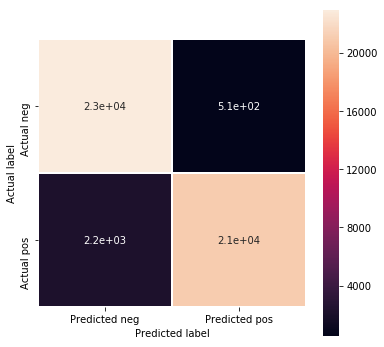

In [413]:
plt.figure(figsize=(6,6))
sns.heatmap(conf_df,annot=True,square=True, linewidths=0.5)
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [ ]:
# traning the test dataset using max_depth:None and max features:16 as found earlier

In [415]:
best_param_grid= [{
    'max_depth': [None],
    'max_features':[16]
}]

In [416]:
final_gs=GridSearchCV(estimator=RandomForestClassifier(random_state=100),param_grid=best_param_grid, cv=10)

In [417]:
final_gs.fit(X_Train, Y_Train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=100, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'max_depth': [None], 'max_features': [16]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [418]:
final_pred=final_gs.predict(X_Test)

In [419]:
Acc_score_Test=accuracy_score(Y_Test, final_pred)

In [420]:
print(Acc_score_Test)

0.9237549204175937


In [421]:
accuracy_score(Y_Test, final_pred,normalize=False)

10795

In [422]:
print(classification_report(Y_Test,final_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.93      5764
           1       0.96      0.88      0.92      5922

   micro avg       0.92      0.92      0.92     11686
   macro avg       0.93      0.92      0.92     11686
weighted avg       0.93      0.92      0.92     11686



#### Confusion Matrix_Final_Test

In [423]:
conf_mat_test=confusion_matrix(Y_Test, final_pred)
conff_df=pd.DataFrame(conf_mat_test,index=['Actual neg', 'Actual pos'], columns=['Predicted neg', 'Predicted pos' ])

In [425]:
conff_df

,Predicted neg,Predicted pos
Actual neg,5556,208
Actual pos,683,5239


Text(33,0.5,'Actual label')

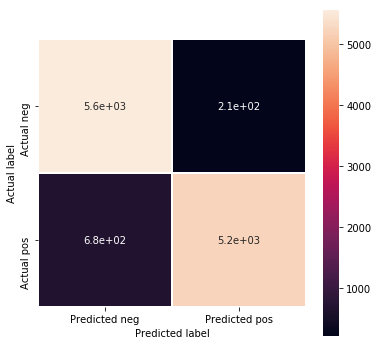

In [426]:
plt.figure(figsize=(6,6))
sns.heatmap(conff_df,annot=True,square=True,linewidths=0.5)
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

#### The model on test data is 92% accurate with 891 wrong predictions which can be seen in confusion matrix